Pennes bioheat mathematical model

\begin{equation*}
  \begin{cases}
    \rho c\frac{\partial u(x, t)}{\partial t} = \nabla . [k \nabla u(x, t)] + \omega_b\rho_b c_b[u_a - u(x, t)] + Q_m + Q_r(x, t) &\text{para } \Omega\\
    k \nabla u(x, t) . \vec{n} = 0 &\text{ para x} \in \Omega_{I,II,IV} \\
    u(x, t) = 37 &\text{ para x} \in \Omega_{III}
  \end{cases}
\end{equation*}

Considerando o caso estacionário, t = 0, temos que
$\rho c\frac{\partial u(x, t)}{\partial t} = 0$
e $Q_r(x, t) = 0$

O que nos levará ao seguinte sistema:
\begin{equation*}
  \begin{cases}
    \nabla . [k \nabla u(x, t)] + \omega_b\rho_b c_b[u_a - u(x, t)] + Q_m = 0 &\text{para } \Omega\\
    k \nabla u(x, t) . \vec{n} = 0 &\text{ para x} \in \Omega_{I,II,IV} \\
    u(x, t) = 37 &\text{ para x} \in \Omega_{III}
  \end{cases}
\end{equation*}

Realizando o processo de discretização fica:

$k \nabla^2 T - \omega_b\rho_b c_b T = - Q_m - \omega_b\rho_b c_b T_a$


$k(T_{i+1,j} + T_{i-1,j} + T_{i,j-1} + T_{i,j+1} - 4T_{i,j}) - \omega_b\rho_b c_b T_{i,j}h^2 = f(x,y)h^2$


Joga o "k" pra dentro e isola T_{i,j}


$T_{i,j} = \frac{fh^2 - k(T_{i+1,j} + T_{i-1,j} + T_{i,j-1} + T_{i,j+1})}{-4k - \omega_b\rho_b c_b h^2}$

In [16]:
# Inicialização das bibliotecas e tudo mais.

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 10]

In [17]:
def criar_matriz_tecido(x, y):
    mt = np.zeros((len(x), len(y)))

    # Agora precisa criar um 'quadrado' de 1s dentro dessa matriz, representando o tumor
    for i in range(0, len(x)):
        for j in range(0, len(y)):
            
            if (y[j] >= 0.03 and y[j] <= 0.05):
                if (x[i] >= 0.005 and x[i] <= 0.15):
                    mt[i, j] = 1
    
    return mt

In [ ]:
# teste da função de criação da matriz de 1s representando o tumor

h = 0.001;
x = np.arange(0, 0.03+h/2, h)
y = np.arange(0, 0.08+h/2, h)
mt = criar_matriz_tecido(x, y)

print(mt)

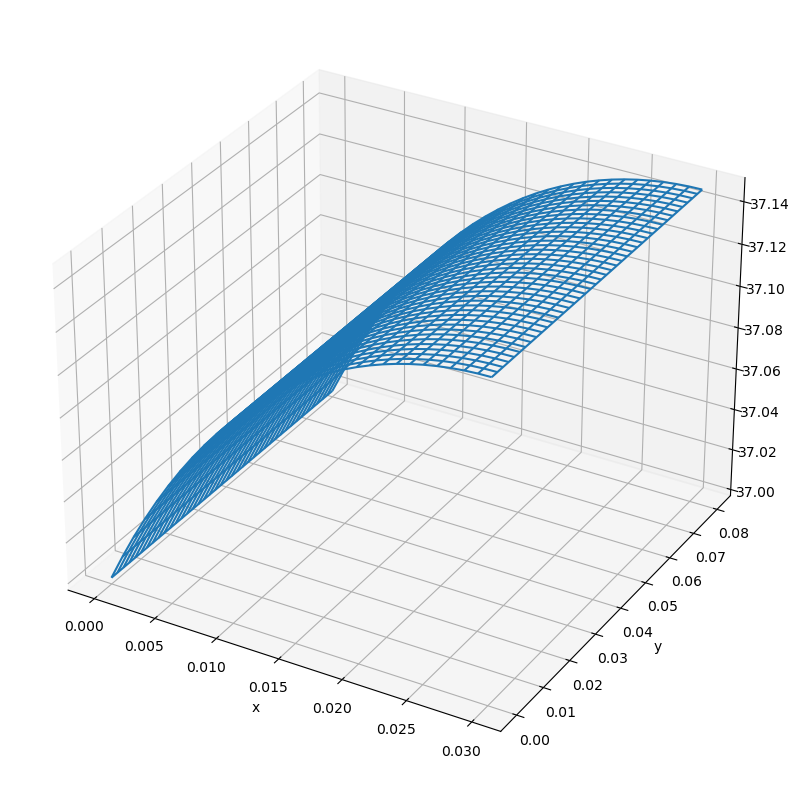

In [13]:
# Simulação apenas do tecido saudável

h = 0.001;
x = np.arange(0, 0.03+h/2, h)
y = np.arange(0, 0.08+h/2, h)

# Condiçoes de Contorno
u_1 = 0  # neumann esquerdo
u_2 = 0  # neumann topo
u_3 = 37 # dirichlet direito
u_4 = 0  # neumann base

tam_x = len(x) # dimensão do sistema
tam_y = len(y) # dimensão do sistema
k = 0
k_max = 100000 # maximo de iteraçoes do metodo
error = 1
error_max = 1e-8 # erro para convergencia

Q_m = 420
w_b = 0.0005
r_b = 1000
c_b = 4000
T_a = 37
kp = 0.5

# funçao do lado direito f
f = np.zeros((tam_x, tam_y))
for i in range(tam_x):
  for j in range(tam_y):
    f[i,j] = - Q_m - (w_b * r_b * c_b * T_a)

# vetor com a solução
u = np.zeros((tam_x, tam_y))
u_new = np.zeros((tam_x, tam_y))

while (k < k_max and error > error_max):
  for i in range(tam_x):
    for j in range(tam_y):
      # para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
      if (i == 0):
        u_new[i,j] = u_3
      else:
        # Tratando condicoes de contorno do tipo Neumann
        uijm = 2*h*u_1 + u[i,1]       if j==0     else u[i,j-1]
        uijp = 2*h*u_2 + u[i,tam_y-2] if j==tam_y-1 else u[i,j+1]
        uipj = 2*h*u_4 + u[tam_x-2,j] if i==tam_x-1 else u[i+1,j]

        uimj = u[i-1,j]
        u_new[i,j] = ((f[i,j]*h**2) - (kp*(uipj + uimj + uijp + uijm))) / (-4.0*kp - ((w_b * r_b * c_b)*h**2))

  error = np.linalg.norm(u_new - u, np.inf) / np.linalg.norm(u_new, np.inf)
  k += 1
  u = np.copy(u_new)

# print(k, error)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(x, y, np.transpose(u))

plt.ylabel('y')
plt.xlabel('x')

plt.show()

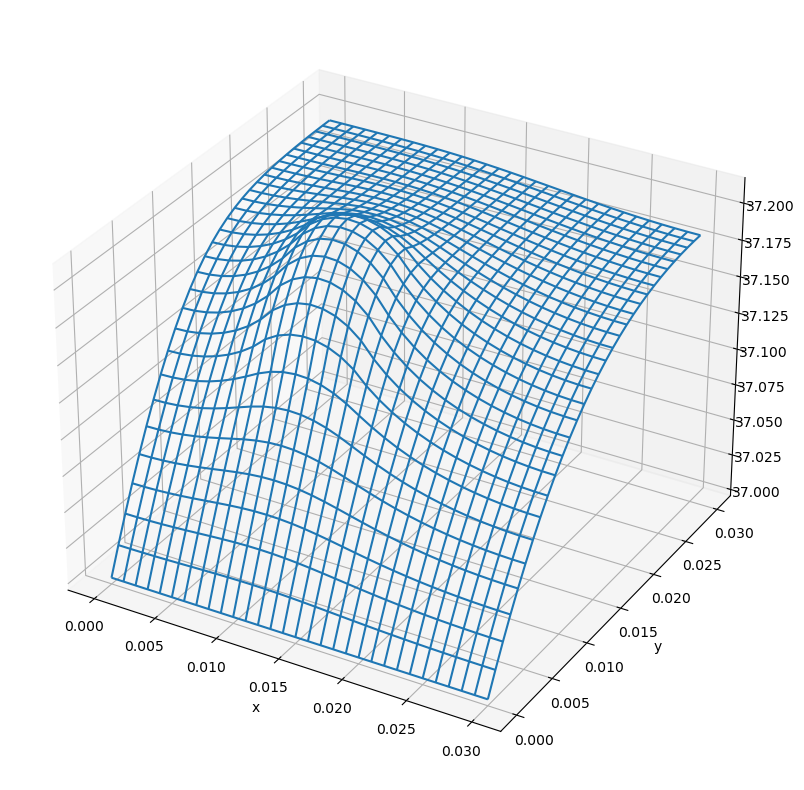

In [17]:
# Simulação com tumor

h = 0.001;
x = np.arange(0, 0.03+h/2, h)
y = np.arange(0, 0.03+h/2, h)

# Condiçoes de Contorno
u_1 = 0  # neumann esquerdo
u_2 = 0  # neumann topo
u_3 = 37 # dirichlet direito
u_4 = 0  # neumann base

tam = len(x) # dimensão do sistema
k = 0
k_max = 100000 # maximo de iteraçoes do metodo
error = 1
error_max = 1e-8 # erro para convergencia

Q_m = np.zeros(2)
Q_m[0] = 420
Q_m[1] = 4200

w_b  = np.zeros(2)
w_b[0] = 0.0005
w_b[1] = 0.002

r_b = 1000
c_b = 4000
T_a = 37
kp = 0.5

# Tipo do tecido; 0 = saudável / 1 = tumor
mt = criar_matriz_tecido(x, y)
# print(mt[6, 14])
# print(mt)

# funçao do lado direito f
f = np.zeros((tam, tam))
for i in range(tam):
  for j in range(tam):
    f[i,j] = - Q_m[int(mt[i,j])] - (w_b[int(mt[i,j])] * r_b * c_b * T_a)

# vetor com a solução
u = np.zeros((tam, tam))
u_new = np.zeros((tam, tam))

while (k < k_max and error > error_max):
  for i in range(tam):
    for j in range(tam):
      ### TODAS AS RELAÇÕES COM PONTOS FICTICIOS
      # uijp = 2*h*u_c+u[i,tam-1] if j==tam-1 else u[i,j+1] 
      # uijm = 2*h*u_a+u[i,1] if j==0 else u[i,j-1]
      # uipj = 2*h*u_d+u[tam-1,j] if i==tam-1 else u[i+1,j] 
      # uimj = 2*h*u_b+u[1,j] if i==0 else u[i-1,j] 
      

      # para tratar do tipo Dirichlet, devemos atribuir diretamente no ponto (x_i,y_j)
      if (i == 0):
        u_new[i,j] = u_3
      else:
        # Tratando condicoes de contorno do tipo Neumann
        uijm = 2*h*u_1 + u[i,1]     if j==0     else u[i,j-1]
        uijp = 2*h*u_2 + u[i,tam-2] if j==tam-1 else u[i,j+1] 
        uipj = 2*h*u_4 + u[tam-2,j] if i==tam-1 else u[i+1,j] 

        uimj = u[i-1,j]
        u_new[i,j] = (f[i,j]*h**2 - kp*(uipj + uimj + uijp + uijm)) / (-4.0*kp - (w_b[int(mt[i,j])] * r_b * c_b)*h**2)
        # u_new[i,j] = (-f[i,j]*h**2 + kp*(uipj + uimj + uijp + uijm)) / (4.0*kp + (w_b[int(mt[i,j])] * r_b * c_b)*h**2)

  error = np.linalg.norm(u_new - u, np.inf) / np.linalg.norm(u_new, np.inf)
  k += 1
  u = np.copy(u_new)

# print(k, error)
x, y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(x, y, u)

plt.ylabel('y')
plt.xlabel('x')

plt.show()